<a href="https://colab.research.google.com/github/nisarg1782/mlp-programs/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data.csv")
data

,Name,Age,Income
0,Sophia,26,42000
1,John,39,88000
2,John,36,95000
3,Daniel,48,73000
4,Olivia,54,96000
5,Emma,37,31000
6,Michael,45,78000
7,Emma,31,86000
8,Olivia,20,67000
9,Michael,42,96000


In [4]:
from sklearn.cluster import KMeans

In [6]:
kn=KMeans(n_clusters=3)
kn.fit(data[["Age","Income"]])
kn.predict([[18,"90000"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sk=MinMaxScaler()


In [9]:
sk.fit(data[["Age"]])


MinMaxScaler()

In [10]:
data["Age"]=sk.transform(data[["Age"]])

In [11]:
data["Age"]

0     0.153846
1     0.487179
2     0.410256
3     0.717949
4     0.871795
5     0.435897
6     0.641026
7     0.282051
8     0.000000
9     0.564103
10    0.512821
11    0.846154
12    0.846154
13    0.384615
14    0.615385
15    0.846154
16    0.923077
17    0.743590
18    0.769231
19    0.897436
20    1.000000
21    0.564103
22    0.461538
23    0.384615
24    0.076923
25    0.256410
26    0.794872
27    0.076923
28    0.615385
29    0.179487
30    0.461538
31    0.666667
32    0.076923
33    0.153846
34    0.666667
35    0.025641
36    0.948718
37    0.743590
38    0.948718
39    0.871795
40    0.820513
41    0.282051
42    0.666667
43    1.000000
44    0.769231
45    0.769231
46    0.179487
47    0.128205
48    0.051282
49    0.923077
Name: Age, dtype: float64

In [12]:
sk.fit(data[["Income"]])


MinMaxScaler()

In [14]:
data["Income"]=sk.transform(data[["Income"]])

In [15]:
data.head(3)

,Name,Age,Income
0,Sophia,0.153846,0.179104
1,John,0.487179,0.865672
2,John,0.410256,0.970149


In [16]:
kn=KMeans(n_clusters=3)


In [17]:
kn.fit(data[["Age","Income"]])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
y_pred=kn.predict(data[["Age","Income"]])
y_pred

array([0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 1, 0, 0, 0, 2], dtype=int32)

In [19]:
data["cluster"]=y_pred

In [20]:
data.head(2)

,Name,Age,Income,cluster
0,Sophia,0.153846,0.179104,0
1,John,0.487179,0.865672,1


In [22]:
kn.cluster_centers_

array([[0.15384615, 0.560199  ],
       [0.69230769, 0.7981521 ],
       [0.76190476, 0.15884861]])

In [23]:
df0=data[data.cluster==0]
df1=data[data.cluster==1]
df2=data[data.cluster==2]


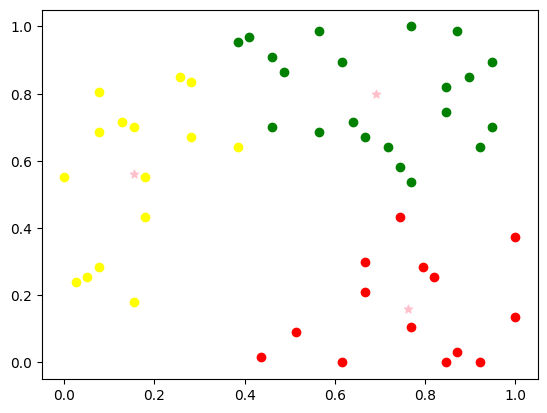

In [30]:
plt.scatter(df0.Age,df0.Income,color="yellow")
plt.scatter(df1.Age,df1.Income,color="green")
plt.scatter(df2.Age,df2.Income,color="red")
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],marker="*",color="pink")


In [33]:
lst=[]
rn=range(1,10)
rn

range(1, 10)

In [34]:
for i in rn:
  kn=KMeans(n_clusters=i)
  kn.fit(data[["Age","Income"]])
  lst.append(kn.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

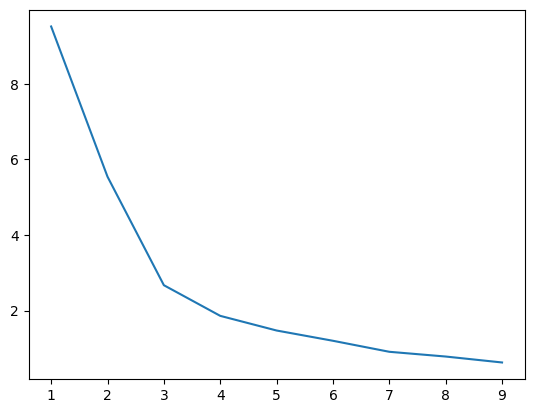

In [35]:
plt.plot(rn,lst)